In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

## DATA PREPARATION

In [2]:
data = pd.read_excel('datasets/dataset CCPP.xlsx')
selected = ['AT','V','AP', 'RH']
X = data[selected].values
y = data['PE'].values
display(data.head(5))
X=(X - X.mean()) / X.std()
m = int(data.shape[0]*3/4)
f = data.shape[1]-1
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train)),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test)),X_test]
y_test = y[m:]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Linear Regression

In [3]:
def pred(x_test, newB):
    return x_test.dot(newB)

In [4]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        h = pred(X,B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
        cost_history[iteration] = cost
    return B, cost_history

In [5]:
B = np.zeros(X_train.shape[1])
alpha = 0.005
iteration_number = 500
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iteration_number)

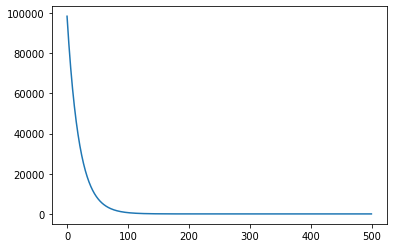

In [6]:
plt.plot(cost_history)
plt.show()

In [7]:
pred_y = pred(X_test,newB)
pred_y_Train = pred(X_train,newB)

In [8]:
print("Coefficients :",newB)

print("\nTRAIN Results :\n")
print("RSS :",sum((pred_y_Train-y_train)**2))
print("RSE :",math.sqrt(sum((pred_y_Train-y_train)**2)*(1/(len(pred_y_Train)-2))))
print("TSS :",sum((y_train-y_train.mean())**2))
print("R Squared :",1-(sum((pred_y_Train-y_train)**2)/sum((y_train-y_train.mean())**2)))
print("MSE :",((pred_y_Train-y_train)**2).mean())

print("\nTEST Results :\n")
print("RSS :",sum((pred_y-y_test)**2))
print("RSE :",math.sqrt(sum((pred_y-y_test)**2)*(1/(len(pred_y)-2))))
print("TSS :",sum((y_test-y_test.mean())**2))
print("R Squared :",1-(sum((pred_y-y_test)**2)/sum((y_test-y_test.mean())**2)))
print("MSE :",((pred_y-y_test)**2).mean())


Coefficients : [ 90.75051694 -59.33688703 -52.13519117 157.18921514 -46.4617274 ]

TRAIN Results :

RSS : 1484678.8393401867
RSE : 14.385851508777229
TSS : 2091902.1056646656
R Squared : 0.29027327076165654
MSE : 206.89504450114174

TEST Results :

RSS : 498716.6110258607
RSE : 14.445346589339218
TSS : 694337.3462431032
R Squared : 0.28173730863779756
MSE : 208.4935664823833
